In [39]:
from Bio import SeqIO
file="/home/davide/Desktop/genomiChro/intergeniche_RefSeq/ortologhi/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375_intergen.fasta"
seqs = SeqIO.parse(file, "fasta")
pidsCCMEE29 = []
for record in seqs:
    start = record.description.find("WP_")
    end = record.description.find("'", start)
    pid = record.description[start:end]
    pidsCCMEE29.append(pid)

In [5]:
proteine = "/home/davide/Desktop/genomiChro/proteine_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375.1.faa"
seqs = SeqIO.parse(proteine, "fasta")
pids_proteine = []
for record in seqs:
    pids_proteine.append(record.id)

In [6]:
print(len(pids_proteine))

5785


In [7]:
print(len(pids))

5339


In [9]:
print([x for x in pids_proteine if x not in pids])

['WP_250121163.1', 'WP_250121169.1', 'WP_250121174.1', 'WP_250121182.1', 'WP_250121201.1', 'WP_250121210.1', 'WP_250121223.1', 'WP_250121232.1', 'WP_250121245.1', 'WP_250121251.1', 'WP_250121298.1', 'WP_250121301.1', 'WP_250121302.1', 'WP_250121304.1', 'WP_250121305.1', 'WP_250121322.1', 'WP_250121328.1', 'WP_250121332.1', 'WP_250121344.1', 'WP_250121350.1', 'WP_250121373.1', 'WP_250121412.1', 'WP_250121431.1', 'WP_250121434.1', 'WP_250121450.1', 'WP_250121466.1', 'WP_250121471.1', 'WP_250121475.1', 'WP_250121483.1', 'WP_250121491.1', 'WP_250121507.1', 'WP_250121508.1', 'WP_250121509.1', 'WP_250121511.1', 'WP_250121513.1', 'WP_250121524.1', 'WP_250121543.1', 'WP_250121553.1', 'WP_250121580.1', 'WP_250121584.1', 'WP_250121585.1', 'WP_250121587.1', 'WP_250121591.1', 'WP_250121611.1', 'WP_250121614.1', 'WP_250121618.1', 'WP_250121622.1', 'WP_250121631.1', 'WP_250121645.1', 'WP_250121660.1', 'WP_250121682.1', 'WP_250121683.1', 'WP_250121721.1', 'WP_250121745.1', 'WP_250121747.1', 'WP_25012

In [10]:
print([x for x in pids if x not in pids_proteine])

[]


In [97]:
from pathlib import Path
intergen_dir = Path("/home/davide/Desktop/genomiChro/intergeniche_RefSeq/ortologhi/")
diz={}
for file in intergen_dir.iterdir():
    pids=[]

    seqs = SeqIO.parse(file, "fasta")
    for record in seqs:
        start = record.description.find("WP_")
        end = record.description.find("'", start)
        pid = record.description[start:end]
        if pid in diz and pid not in pids:
            diz[pid].append(str(record.seq))
        elif pid in pidsCCMEE29:
            diz[pid] = [str(record.seq)]
        pids.append(pid)


In [98]:
print(len(diz))

5154


(array([ 608.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  550.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  311.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  279.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  211.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  196.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  290.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  761.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1948.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32

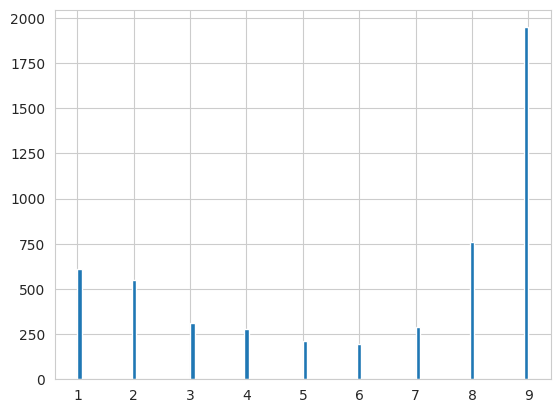

In [99]:
#make a plot of lenght of pids[pid] for each pid
import matplotlib.pyplot as plt
lenghts = [len(x) for x in diz.values()]
plt.hist(lenghts, bins=100)


In [34]:
#print duplicated of pids
from collections import Counter
print([pid for pid, count in Counter(pids).items() if count > 1])

['WP_250126516.1', 'WP_250126247.1', 'WP_250126319.1']


In [101]:
csv="/home/davide/Desktop/genomiChro/blastpcsv/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375.csv"
import pandas as pd
df = pd.read_csv(csv)
df
#find duplicated in df of pidCCMEE29\
df[df.duplicated(subset="pidCCMEE29", keep=False)]
#find rows with lexA in info column
df[df["info"].str.contains("single-stranded DNA-binding protein")]

,pidCCMEE29,pid,info,pident,length,evalue,locus
3894,WP_250121164.1,WP_250121164.1,WP_250121164.1 single-stranded DNA-binding pro...,100.0,168,2.020000e-126,LAU37_RS14180
4668,WP_250122517.1,WP_250122517.1,WP_250122517.1 single-stranded DNA-binding pro...,100.0,122,2.470000e-87,LAU37_RS21505


In [80]:
dizlexa=diz["WP_250121220.1"]
dizrecA=diz["WP_250121493.1"]

In [81]:
#find AGT.{8}ACT in all sequences of dizlexa
import re
for seq in dizlexa:
    print(re.search(".....AGT.{9}CTA.........", seq))

<re.Match object; span=(76, 105), match='TTTGTAGTACGAATGTTCTATAGACCTTT'>
<re.Match object; span=(98, 127), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>
None
<re.Match object; span=(89, 118), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>
<re.Match object; span=(112, 141), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>
<re.Match object; span=(194, 223), match='TTTGTAGTACGACTGTTCTAAGAGGTTTA'>
<re.Match object; span=(27, 56), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>
<re.Match object; span=(112, 141), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>
<re.Match object; span=(112, 141), match='TTTGTAGTACGACTGTTCTAAGAGGTCTA'>


In [96]:
from IPython.display import Markdown, display
for seq in dizrecA:
    s=re.search(".......AGT.{8}ACT....", seq).group(0)
    #put * before AGT after AGT and before ACT after ACT
    s=s[:6]+"**"+s[6:10]+"**"+s[10:18]+"**"+s[18:22]+"**"+s[22:]
    display(Markdown(s))
    #how pri

CTAAAA**TAGT**ATATCTGC**ACTA**GTC

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

TTAAAA**TAGT**ATATCTGC**ACTA**GTC

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

CTAAAA**TAGT**ATATCTGC**ACTA**GTT

In [100]:
#use pickle to save diz
import pickle
with open("diz.pickle", "wb") as f:
    pickle.dump(diz, f)

In [102]:
ssb1=diz["WP_250121164.1"]
ssb2=diz["WP_250122517.1"]


In [105]:
#find AGT.{8}ACT in all sequences of ssb1
import re
for seq in ssb1:
    print(re.search(".AGT.{9}CTA.", seq))

None
None
<re.Match object; span=(12, 29), match='TAGTGATTAGTGGCTAG'>
None
None
None
None
None
None


In [104]:
#find AGT.{8}ACT in all sequences of ssb2
import re
for seq in ssb2:
    print(re.search(".AGT.{8}ACT.", seq))
    

<re.Match object; span=(175, 191), match='GAGTAGCCCTACACTT'>
<re.Match object; span=(272, 288), match='AAGTACAATTGTACTA'>
<re.Match object; span=(161, 177), match='GAGTACATTTGTACTG'>
<re.Match object; span=(190, 206), match='TAGTCACCAGCCACTG'>
<re.Match object; span=(272, 288), match='AAGTACAATTGTACTA'>
<re.Match object; span=(272, 288), match='AAGTACAATTGTACTA'>
<re.Match object; span=(272, 288), match='GAGTACAATTGTACTA'>
<re.Match object; span=(272, 288), match='AAGTACAATTGTACTA'>
<re.Match object; span=(272, 288), match='AAGTACAATTGTACTA'>
